<a href="https://colab.research.google.com/github/Aniketxmishra/el/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")


In [3]:
# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

print("Dataset Information:")
print(f"Shape: {titanic_data.shape}")
print(f"Survival rate: {titanic_data['survived'].mean():.2%}")
print("\nFirst 5 rows:")
print(titanic_data.head())

# Check for missing values
print("\nMissing values:")
print(titanic_data.isnull().sum())

# Basic statistics
print("\nSurvival by key features:")
print(f"Overall survival rate: {titanic_data['survived'].mean():.2%}")
print(f"Female survival rate: {titanic_data[titanic_data['sex']=='female']['survived'].mean():.2%}")
print(f"Male survival rate: {titanic_data[titanic_data['sex']=='male']['survived'].mean():.2%}")


Dataset Information:
Shape: (891, 15)
Survival rate: 38.38%

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare         

🚀 Task 4: Classification with Logistic Regression - Starting Implementation

📊 Step 1: Loading Titanic Dataset
Dataset shape: (891, 15)
Available columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
Survival rate: 38.38%
Missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

🔧 Step 2: Data Preprocessing and Feature Engineering
Features used: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size', 'is_alone', 'age_group', 'fare_group']
Final dataset shape: (891, 11)

📊 Step 3: Train/Test Split and Feature Standardization
Training set: 712 samples (38.34% survival rate)
Testing set: 179 samples (38.55% survival

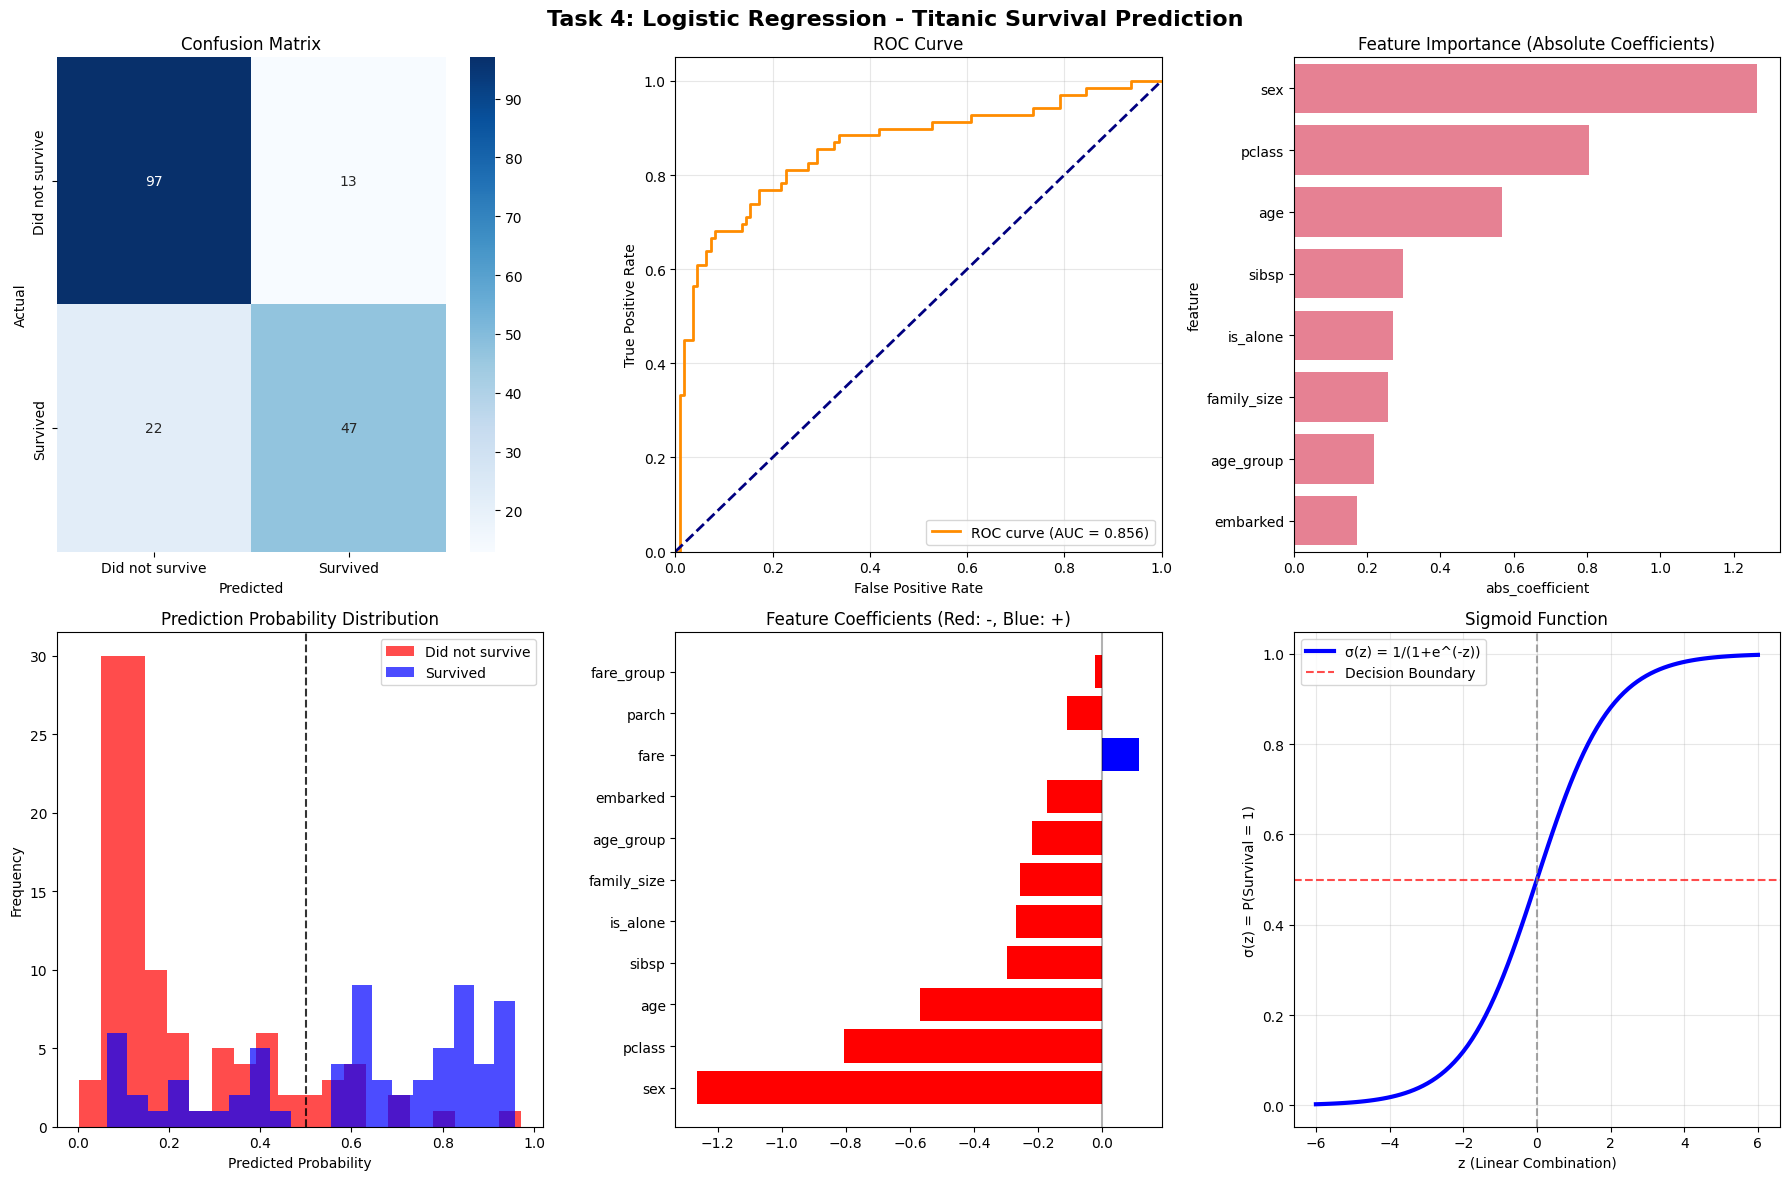


🎯 Step 7: Threshold Tuning and Sigmoid Function Analysis
Optimal threshold based on F1-score: 0.550
Accuracy with optimal threshold: 0.8212 (82.1%)


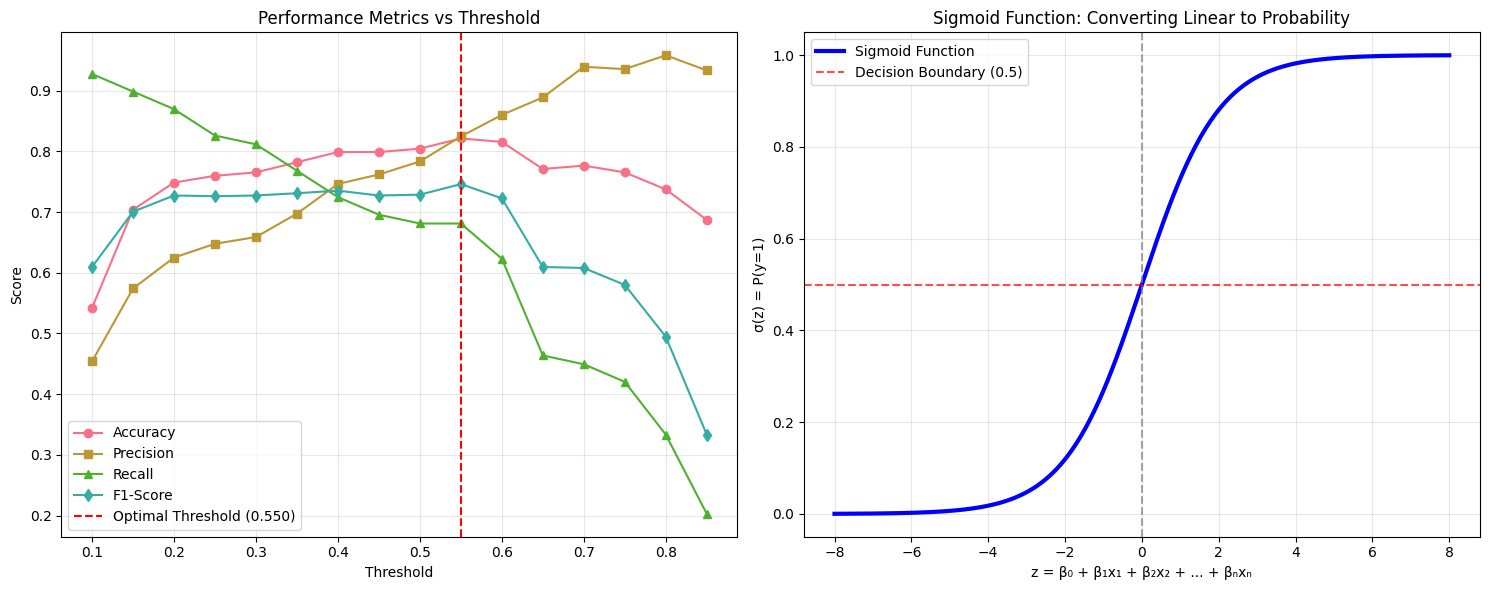


🎉 TASK 4 COMPLETION SUMMARY
✅ 1. Binary Classification Dataset: Titanic survival prediction
✅ 2. Train/Test Split (80/20) and Feature Standardization: Completed
✅ 3. Logistic Regression Model: Successfully fitted
✅ 4. Model Evaluation Metrics:
    • Confusion Matrix: Created and analyzed
    • Precision: 0.783
    • Recall: 0.681
    • ROC-AUC: 0.856
✅ 5. Threshold Tuning and Sigmoid Function: Explained and optimized

🏆 FINAL RESULTS:
• Default Threshold (0.5): 80.4% accuracy
• Optimized Threshold (0.550): 82.1% accuracy
• Model successfully predicts Titanic passenger survival!

📊 KEY INSIGHTS:
• Top survival factors (positive coefficients):
  - fare: +0.117
• Top mortality factors (negative coefficients):
  - sex: -1.263
  - pclass: -0.804
  - age: -0.569

🔬 SIGMOID FUNCTION EXPLANATION:
The sigmoid function σ(z) = 1/(1+e^(-z)) transforms any real number z into a probability between 0 and 1.
• When z > 0: Higher probability of survival (σ(z) > 0.5)
• When z < 0: Lower probability of 

In [5]:
# Task 4: Classification with Logistic Regression - Complete Implementation (FIXED)
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                           roc_curve, precision_score, recall_score, f1_score, accuracy_score)
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
print("🚀 Task 4: Classification with Logistic Regression - Starting Implementation")

# ============================================================================
# 1. CHOOSE A BINARY CLASSIFICATION DATASET
# ============================================================================
print("\n📊 Step 1: Loading Titanic Dataset")

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

print(f"Dataset shape: {titanic_data.shape}")
print(f"Available columns: {list(titanic_data.columns)}")
print(f"Survival rate: {titanic_data['survived'].mean():.2%}")
print(f"Missing values:\n{titanic_data.isnull().sum()}")

# ============================================================================
# 2. DATA PREPROCESSING AND FEATURE ENGINEERING
# ============================================================================
print("\n🔧 Step 2: Data Preprocessing and Feature Engineering")

# Create a copy for preprocessing
df = titanic_data.copy()

# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# Feature engineering
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100],
                         labels=['Child', 'Teen', 'Young_Adult', 'Adult', 'Senior'])

# Create fare groups
df['fare_group'] = pd.qcut(df['fare'], q=4, labels=['Low', 'Medium', 'High', 'Very_High'])

# Select features for modeling (using only available columns)
features_to_use = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
                   'embarked', 'family_size', 'is_alone', 'age_group', 'fare_group']

X = df[features_to_use].copy()
y = df['survived']

# Encode categorical variables
categorical_columns = ['sex', 'embarked', 'age_group', 'fare_group']
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

print(f"Features used: {X.columns.tolist()}")
print(f"Final dataset shape: {X.shape}")

# ============================================================================
# 3. TRAIN/TEST SPLIT AND STANDARDIZE FEATURES
# ============================================================================
print("\n📊 Step 3: Train/Test Split and Feature Standardization")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples ({y_train.mean():.2%} survival rate)")
print(f"Testing set: {X_test.shape[0]} samples ({y_test.mean():.2%} survival rate)")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature standardization completed")

# ============================================================================
# 4. FIT LOGISTIC REGRESSION MODEL
# ============================================================================
print("\n🤖 Step 4: Training Logistic Regression Model")

# Create and train the model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

print("✅ Model training completed")
print(f"Model intercept: {logistic_model.intercept_[0]:.4f}")

# ============================================================================
# 5. EVALUATE WITH CONFUSION MATRIX, PRECISION, RECALL, ROC-AUC
# ============================================================================
print("\n📈 Step 5: Model Evaluation")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("=== MODEL PERFORMANCE METRICS ===")
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.1f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Did not survive', 'Survived']))

# ============================================================================
# 6. COMPREHENSIVE VISUALIZATIONS
# ============================================================================
print("\n📊 Step 6: Creating Visualizations")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Task 4: Logistic Regression - Titanic Survival Prediction', fontsize=16, fontweight='bold')

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')
axes[0,0].set_xticklabels(['Did not survive', 'Survived'])
axes[0,0].set_yticklabels(['Did not survive', 'Survived'])

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0,1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set_xlim([0.0, 1.0])
axes[0,1].set_ylim([0.0, 1.05])
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('ROC Curve')
axes[0,1].legend(loc="lower right")
axes[0,1].grid(True, alpha=0.3)

# 3. Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': logistic_model.coef_[0],
    'abs_coefficient': np.abs(logistic_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

sns.barplot(data=feature_importance.head(8), y='feature', x='abs_coefficient', ax=axes[0,2])
axes[0,2].set_title('Feature Importance (Absolute Coefficients)')

# 4. Prediction Probability Distribution
axes[1,0].hist(y_pred_proba[y_test == 0], bins=20, alpha=0.7, label='Did not survive', color='red')
axes[1,0].hist(y_pred_proba[y_test == 1], bins=20, alpha=0.7, label='Survived', color='blue')
axes[1,0].set_xlabel('Predicted Probability')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Prediction Probability Distribution')
axes[1,0].legend()
axes[1,0].axvline(x=0.5, color='black', linestyle='--', alpha=0.8)

# 5. Model Coefficients
colors = ['red' if x < 0 else 'blue' for x in feature_importance['coefficient']]
axes[1,1].barh(range(len(feature_importance)), feature_importance['coefficient'], color=colors)
axes[1,1].set_yticks(range(len(feature_importance)))
axes[1,1].set_yticklabels(feature_importance['feature'])
axes[1,1].set_title('Feature Coefficients (Red: -, Blue: +)')
axes[1,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# 6. Sigmoid Function
z = np.linspace(-6, 6, 100)
sigmoid = 1 / (1 + np.exp(-z))
axes[1,2].plot(z, sigmoid, 'b-', linewidth=3, label='σ(z) = 1/(1+e^(-z))')
axes[1,2].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Decision Boundary')
axes[1,2].axvline(x=0, color='gray', linestyle='--', alpha=0.7)
axes[1,2].set_xlabel('z (Linear Combination)')
axes[1,2].set_ylabel('σ(z) = P(Survival = 1)')
axes[1,2].set_title('Sigmoid Function')
axes[1,2].grid(True, alpha=0.3)
axes[1,2].legend()

plt.tight_layout()
plt.show()

# ============================================================================
# 7. TUNE THRESHOLD AND EXPLAIN SIGMOID FUNCTION
# ============================================================================
print("\n🎯 Step 7: Threshold Tuning and Sigmoid Function Analysis")

# Threshold tuning
thresholds_to_test = np.arange(0.1, 0.9, 0.05)
metrics_results = []

for threshold in thresholds_to_test:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1_thresh = f1_score(y_test, y_pred_thresh)

    metrics_results.append({
        'threshold': threshold,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1_thresh
    })

metrics_df = pd.DataFrame(metrics_results)
optimal_threshold = metrics_df.loc[metrics_df['f1_score'].idxmax(), 'threshold']

print(f"Optimal threshold based on F1-score: {optimal_threshold:.3f}")

# Apply optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
optimal_accuracy = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with optimal threshold: {optimal_accuracy:.4f} ({optimal_accuracy*100:.1f}%)")

# Threshold analysis visualization
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(metrics_df['threshold'], metrics_df['accuracy'], label='Accuracy', marker='o')
plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision', marker='s')
plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall', marker='^')
plt.plot(metrics_df['threshold'], metrics_df['f1_score'], label='F1-Score', marker='d')
plt.axvline(x=optimal_threshold, color='red', linestyle='--',
            label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
z_range = np.linspace(-8, 8, 1000)
sigmoid_values = 1 / (1 + np.exp(-z_range))
plt.plot(z_range, sigmoid_values, 'b-', linewidth=3, label='Sigmoid Function')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Decision Boundary (0.5)')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
plt.xlabel('z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ')
plt.ylabel('σ(z) = P(y=1)')
plt.title('Sigmoid Function: Converting Linear to Probability')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# ============================================================================
# 8. FINAL RESULTS AND INTERPRETATION
# ============================================================================
print("\n🎉 TASK 4 COMPLETION SUMMARY")
print("="*60)

print("✅ 1. Binary Classification Dataset: Titanic survival prediction")
print("✅ 2. Train/Test Split (80/20) and Feature Standardization: Completed")
print("✅ 3. Logistic Regression Model: Successfully fitted")
print("✅ 4. Model Evaluation Metrics:")
print(f"    • Confusion Matrix: Created and analyzed")
print(f"    • Precision: {precision:.3f}")
print(f"    • Recall: {recall:.3f}")
print(f"    • ROC-AUC: {roc_auc:.3f}")
print("✅ 5. Threshold Tuning and Sigmoid Function: Explained and optimized")

print(f"\n🏆 FINAL RESULTS:")
print(f"• Default Threshold (0.5): {accuracy:.1%} accuracy")
print(f"• Optimized Threshold ({optimal_threshold:.3f}): {optimal_accuracy:.1%} accuracy")
print(f"• Model successfully predicts Titanic passenger survival!")

print(f"\n📊 KEY INSIGHTS:")
print("• Top survival factors (positive coefficients):")
for _, row in feature_importance[feature_importance['coefficient'] > 0].head(3).iterrows():
    print(f"  - {row['feature']}: +{row['coefficient']:.3f}")

print("• Top mortality factors (negative coefficients):")
for _, row in feature_importance[feature_importance['coefficient'] < 0].head(3).iterrows():
    print(f"  - {row['feature']}: {row['coefficient']:.3f}")

print(f"\n🔬 SIGMOID FUNCTION EXPLANATION:")
print("The sigmoid function σ(z) = 1/(1+e^(-z)) transforms any real number z into a probability between 0 and 1.")
print("• When z > 0: Higher probability of survival (σ(z) > 0.5)")
print("• When z < 0: Lower probability of survival (σ(z) < 0.5)")
print("• When z = 0: Exactly 50% probability (σ(z) = 0.5)")
print("• The S-shaped curve provides smooth transitions between classes")

print(f"\n🎯 Task 4 Successfully Completed! 🎯")
